In [1]:
import numpy as np
import pandas as pd
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("ggplot")
%matplotlib inline

### データ準備

In [2]:
np.random.seed(123)
N1= 30
N2 = 20
Y1 = np.random.normal(0, 5, N1)
Y2 = np.random.normal(1, 4, N2)

### (1)

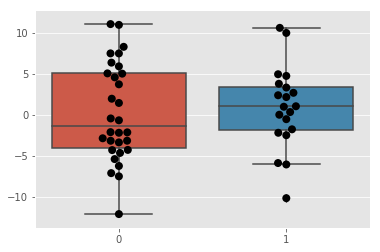

In [3]:
sns.boxplot(data=[Y1, Y2])
sns.swarmplot(data=[Y1, Y2], color="black", size=8)
plt.show()

### (2)

$Y_1[n] \sim Normal(\mu_1, \sigma) \; n=1,...,N_1$  
$Y_2[n] \sim Normal(\mu_2, \sigma) \; n=1,...,N_2$

### (3)

In [4]:
data = {
    "N1": N1,
    "N2": N2,
    "Y1": Y1,
    "Y2": Y2,
}
stan_model1 = pystan.StanModel(file="model/exercise3.stan")
fit1 = stan_model1.sampling(data=data, seed=1234)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cf50942e1b6c6a3f2d49f3a4ffca669c NOW.


### (4)

In [5]:
ms1 = fit1.extract()
sum(ms1["mu1"] < ms1["mu2"]) / len(ms1["mu1"])

0.655

### (5)

$Y_1[n] \sim Normal(\mu_1, \sigma_1) \; n=1,...,N_1$  
$Y_2[n] \sim Normal(\mu_2, \sigma_2) \; n=1,...,N_2$

In [6]:
data = {
    "N1": N1,
    "N2": N2,
    "Y1": Y1,
    "Y2": Y2,
}
stan_model2 = pystan.StanModel(file="model/exercise5.stan")
fit2 = stan_model2.sampling(data=data, seed=1234)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8499a7d8c67e20f5e547acb055e19642 NOW.


In [7]:
ms2 = fit2.extract()
sum(ms2["mu1"] < ms2["mu2"]) / len(ms2["mu1"])

0.65775